# EDA

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

### Train Data

In [3]:
df_train = pd.read_csv(
   "Datasets/Raw/train.csv",
   usecols=["PassengerId", "Survived", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"],
   index_col="PassengerId"
)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Test Data

In [4]:
df_test = pd.read_csv(
   "Datasets/Raw/test.csv",
   usecols=["PassengerId", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"],
   index_col="PassengerId"
)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## Exploration

In [5]:
df_train = df_train.rename(
   columns={
      "Sex": "Gender",
      "Pclass": "Class",
      "Parch": "ParCh"
   }
)

df_test = df_test.rename(
   columns={
      "Sex": "Gender",
      "Pclass": "Class",
      "Parch": "ParCh"
   }
)

Number of rows and columns

In [6]:
df_cleaned = df_train.copy()
df_cleaned.shape

(891, 9)

Quantity of misssing values

In [7]:
print("Train null values:")
print(df_cleaned.isnull().sum())

print("\nTest null values:")
print(df_test.isnull().sum())

Train null values:
Survived      0
Class         0
Name          0
Gender        0
Age         177
SibSp         0
ParCh         0
Fare          0
Embarked      2
dtype: int64

Test null values:
Class        0
Name         0
Gender       0
Age         86
SibSp        0
ParCh        0
Fare         1
Embarked     0
dtype: int64


### Data Imputation

In [8]:
from math import isnan

prefixes = {
   "Master.": {
      "values": [],
      "m": 0
   },
   "Miss.": {
      "values": [],
      "m": 0
   },
   "Mrs.": {
      "values": [],
      "m": 0
   },
   "Mr.": {
      "values": [],
      "m": 0
   }
}

def get_age_values_per_prefix(df):
   for _, row in df.iterrows():
      for prefix in prefixes:
         if prefix in row.Name and not isnan(row.Age):
            prefixes[prefix]["values"].append(row.Age)

get_age_values_per_prefix(df_cleaned)
get_age_values_per_prefix(df_test)

for prefix in prefixes:
   prefixes[prefix]["m"] = prefixes[prefix]["values"][len(prefixes[prefix]["values"])//3]

def replace_age_nans(df):
   replace = []

   for _, row in df.iterrows():
      for prefix in prefixes:
         if prefix in row.Name and isnan(row.Age):
            replace.append(prefixes[prefix]["m"])
            break
      else:
         replace.append(row.Age)

   df.Age = replace

replace_age_nans(df_cleaned)
replace_age_nans(df_test)

### Filling nan values

In [9]:
df_cleaned.Age = df_cleaned.Age.fillna(-1)
df_cleaned.Age = df_cleaned.Age.astype("int")
df_cleaned.dropna(inplace=True)

df_test.Age = df_test.Age.fillna(-1)
df_test.Age = df_test.Age.astype("int")
df_test.Fare = df_test.Fare.fillna(-1)

Train Data cleaned

In [10]:
df_cleaned.head()

,Survived,Class,Name,Gender,Age,SibSp,ParCh,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S


## Data to JSON file

In [220]:
df_train_json = df_cleaned.copy()

df_train_json.Survived = df_train_json.Survived.replace(0, False)
df_train_json.Survived = df_train_json.Survived.replace(1, True)

df_train_json.Embarked = df_train_json.Embarked.replace("C", "Cherbourg")
df_train_json.Embarked = df_train_json.Embarked.replace("Q", "Queenstown")
df_train_json.Embarked = df_train_json.Embarked.replace("S", "Southampton")

df_train_json.to_json(
   "passengers.json",
   orient="records"
)

## Data visualization

In [11]:
plt.style.use("ggplot")
plt.rcParams.update({
   "figure.facecolor": (1.0,1.0,1.0,0.1),
   "text.color": "w"
})

### Survived

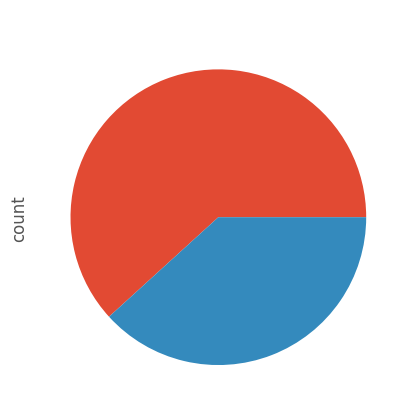

In [12]:
df_cleaned.Survived.value_counts().plot(
   kind="pie",
   title="Survived"
)
plt.show()

### Gender, Class, Embarked

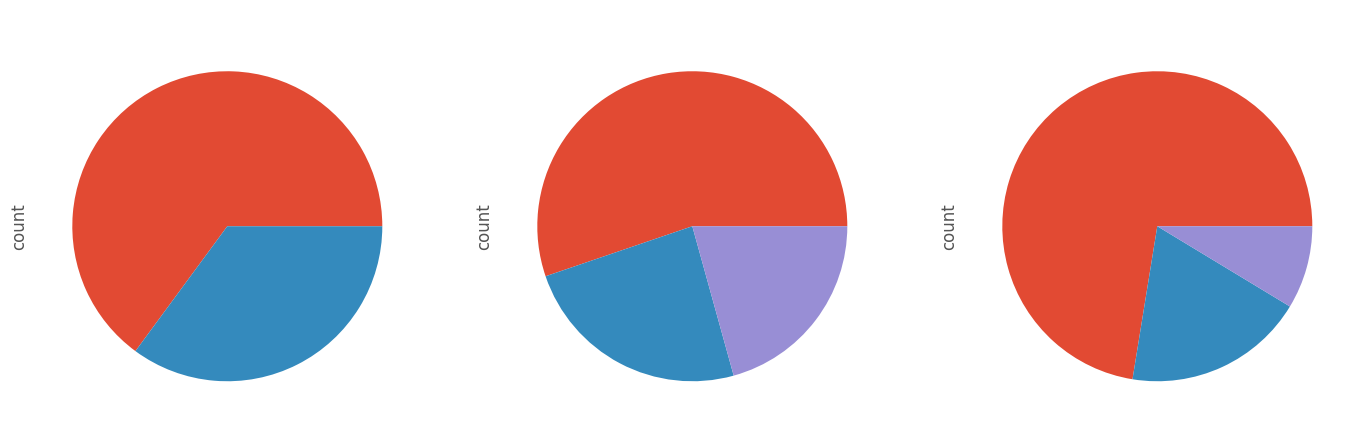

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(17,17))

df_cleaned.Gender.value_counts().plot(
   kind="pie",
   title="Gender",
   ax=axes[0]
)
df_cleaned.Class.value_counts().plot(
   kind="pie",
   title="Class",
   ax=axes[1]
)
df_cleaned.Embarked.value_counts().plot(
   kind="pie",
   title="Embarked",
   ax=axes[2]
)
plt.show()

### Fare Distribution

In [21]:
plt.rcParams.update({
   "text.color": "b"
})

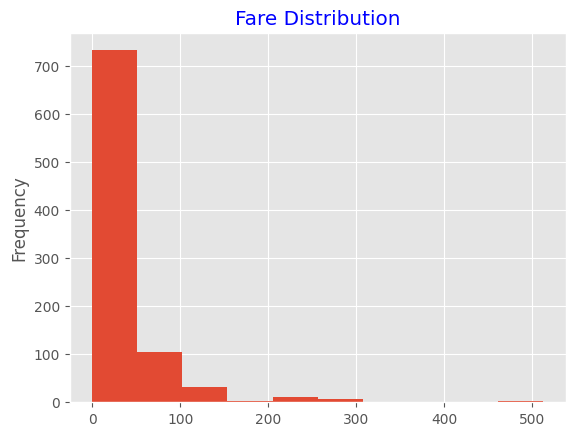

In [22]:
df_cleaned.Fare.plot(
   kind="hist"
)
plt.title("Fare Distribution")
plt.show()

### Age Distribution

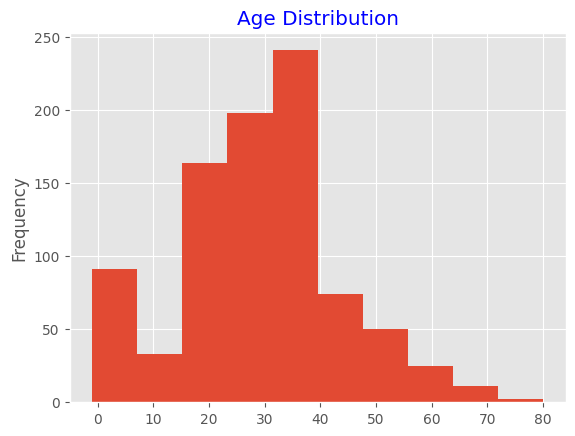

In [23]:
df_cleaned.Age.plot(
   kind="hist"
)
plt.title("Age Distribution")
plt.show()

## Categorical to Numerical values

In [16]:
embarked_to_number = {
   "C": 0,
   "Q": 1,
   "S": 2
}

df_cleaned.Gender = [
   0 if row == "male" else 1
   for row in df_cleaned.Gender
]

df_cleaned.Embarked = [
   embarked_to_number[row]
   for row in df_cleaned.Embarked
]

df_test.Gender = [
   0 if row == "male" else 1
   for row in df_test.Gender
]

df_test.Embarked = [
   embarked_to_number[row]
   for row in df_test.Embarked
]

Name column is not relevant in features space to predict survived column

In [17]:
df_cleaned.drop(columns="Name", inplace=True)
df_test.drop(columns="Name", inplace=True)

df_cleaned.head()

,Survived,Class,Gender,Age,SibSp,ParCh,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22,1,0,7.2500,2
2,1,1,1,38,1,0,71.2833,0
3,1,3,1,26,0,0,7.9250,2
4,1,1,1,35,1,0,53.1000,2
5,0,3,0,35,0,0,8.0500,2


## Correlation between columns

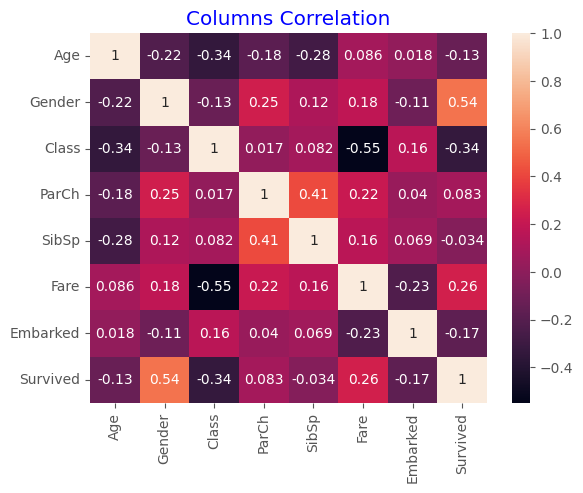

In [24]:
sns.heatmap(
   df_cleaned[
      ["Age", "Gender", "Class", "ParCh", "SibSp", "Fare", "Embarked", "Survived"]
   ].corr(),
   annot=True
)
plt.title("Columns Correlation")
plt.show()

## Saving data cleaned

In [229]:
df_cleaned.to_csv("Datasets/Clean/train.csv")
df_test.to_csv("Datasets/Clean/test.csv")